# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [2]:
# Libraries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

## Challenge 1

#### The data we will use in this challenge is:

In [3]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

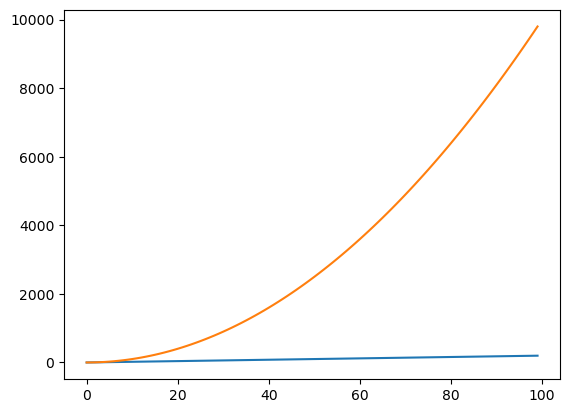

In [4]:
# Method 1
plt.plot(x,y)
plt.plot(x,z)
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

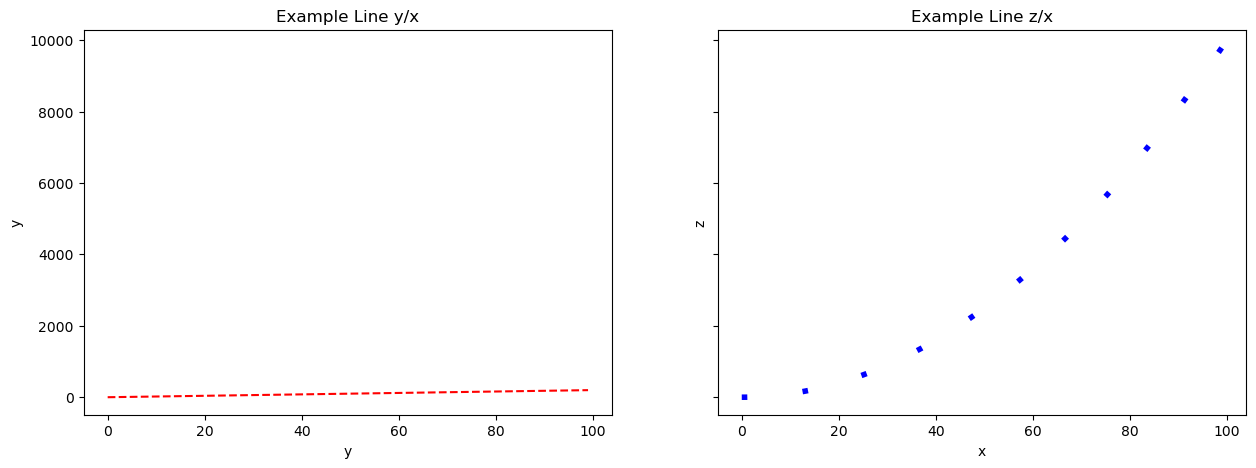

In [5]:
# Method 2
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,5))
#changing to 2 rows, one column will stack the plots one on top of the other 
# vs. side by side. 
ax1.set_title("Example Line y/x")
ax1.set_xlabel("y")
ax1.set_ylabel("y")
ax1.plot(x,y, ls="--", color="red")

ax2.set(title="Example Line z/x", xlabel="x", ylabel="z")
ax2.plot(x,z, ls=(0, (1,10)), color="blue", linewidth='4')
# line styles : solid, dotted, dashed, dashdot, (0, (1,10)) (points)
# detail here https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html 
# default linewidth is 1

plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

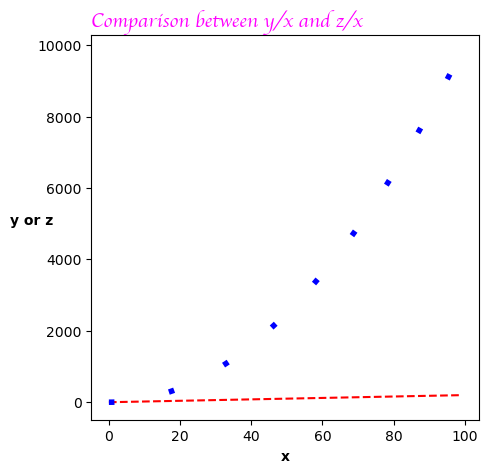

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(5,5))
ax.set_title("Comparison between y/x and z/x", loc='left', color="fuchsia", fontfamily='cursive', fontsize='x-large')
ax.set_xlabel("x", fontweight='bold')
ax.set_ylabel("y or z", fontweight='bold', rotation='horizontal') # yeah two figures would be better than one
plt.plot(x,y, ls="--", color="red")
plt.plot(x,z, ls=(0, (1,10)), color="blue", linewidth='4')
plt.show()

#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

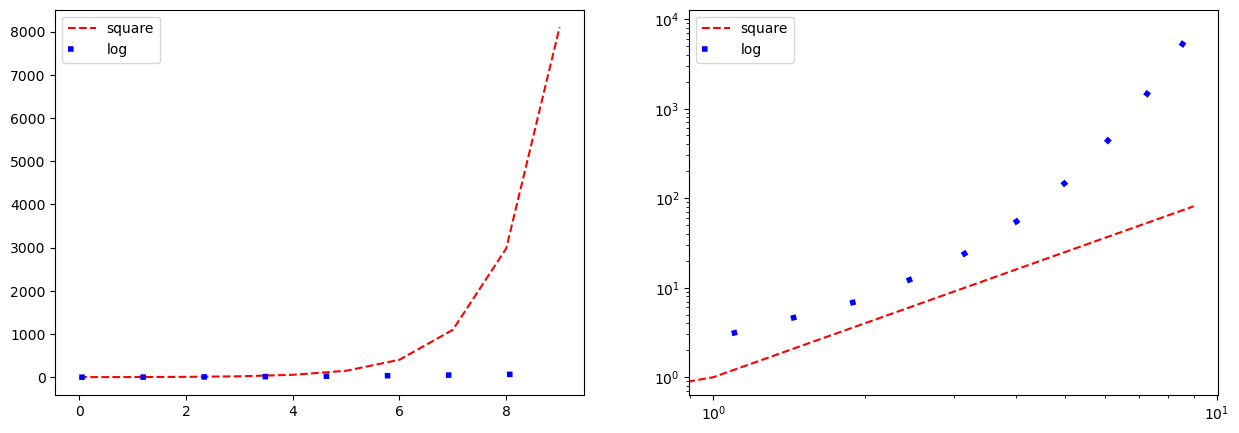

In [7]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(15,5))

# ax.set_title("Comparing square and log scales")
x = np.arange(0,10)
z=x**2
q=np.exp(x)

ax1.plot(x, q, ls="--", color="red", label="square")
ax1.plot(x, z, ls=(0, (1,10)), color="blue", linewidth='4', label="log")
ax1.legend(loc='upper left')

ax2.set(xscale='log', yscale='log')
ax2.plot(x, z, ls="--", color="red", label="square")
ax2.plot(x, q, ls=(0, (1,10)), color="blue", linewidth='4', label="log")
ax2.legend(loc='upper left')

plt.show()

#### As a bonus challenge, try to add a legend to the plot.

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [8]:
fitbit= pd.read_csv("Fitbit2.csv")
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,...,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,...,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,...,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,...,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


In [9]:
a = pd.DataFrame(fitbit.groupby('Months_encoded', as_index=False)['Steps'].median())
b= list(a.iloc[:,0])
c= list(a.iloc[:,1])
a

,Months_encoded,Steps
0,1,10366.0
1,2,9235.0
2,3,11122.0
3,4,13846.5
4,5,11998.0
5,6,12935.5
6,7,10644.0
7,8,12213.0
8,9,9343.0
9,10,7865.0


In [10]:
d = pd.DataFrame(fitbit.groupby('Work_or_Weekend', as_index=False)['Steps'].median())
e= list(d.iloc[:,0])
f= list(d.iloc[:,1])
d

,Work_or_Weekend,Steps
0,0,9998.0
1,1,10445.5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

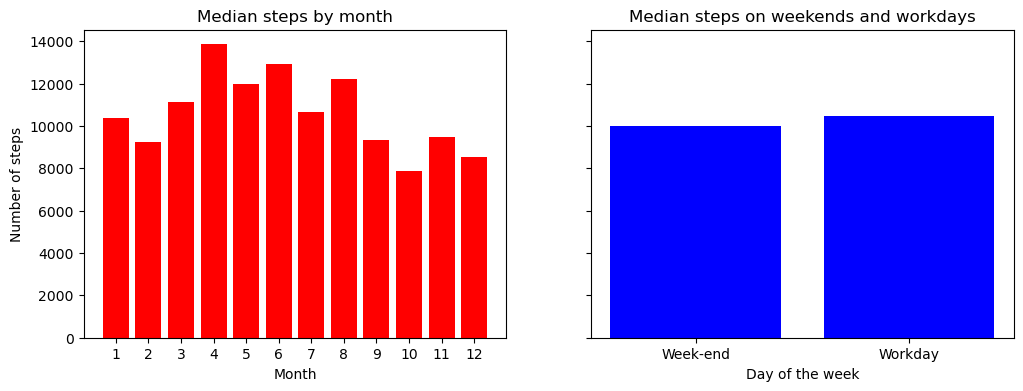

In [11]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12,4))

ax1.set_title("Median steps by month")
ax1.set_xlabel("Month")
ax1.set_xticks(a.Months_encoded)
ax1.set_ylabel("Number of steps")
ax1.bar(list(a.iloc[:,0]),list(a.iloc[:,1]), ls="--", color="red")


ax2.set_title("Median steps on weekends and workdays")
ax2.set_xlabel("Day of the week")
ax2.set_xticks(d.index)
ax2.set_xticklabels(['Week-end', 'Workday'])
ax2.bar(list(d.iloc[:,0]),list(d.iloc[:,1]), ls=(0, (1,10)), color="blue")


plt.show()
fig.savefig('steps_per_month_and_days.jpg')

### to manage subplots
```
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.plot([1, 2, 3], [0, 0.5, 0.2])

plt.subplot(1, 2, 2)
plt.plot([3, 2, 1], [0, 0.5, 0.2])

plt.suptitle('Implicit Interface: re-call subplot')

for i in range(1, 3):
    plt.subplot(1, 2, i)
    plt.xlabel('Boo')
```
### For xticks and labels 
```
 ax = df.plot()
 ax.set_xticks(df.index)
 ax.set_xticklabels(df.C, rotation=90)
```

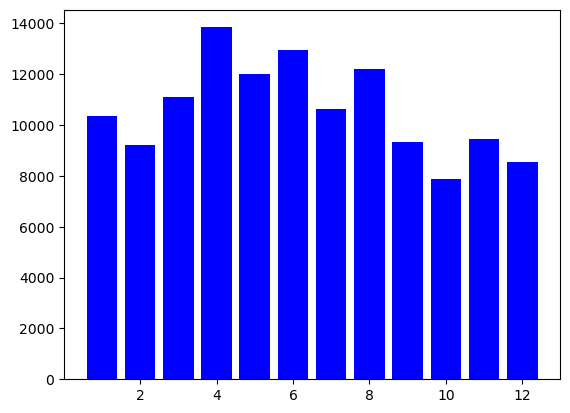

In [12]:
# MEDIAN STEPS BY MONTH_ENCODED
x= [i for i in b]
y= [j for j in c]
plt.bar(x,y, ls="--", color="blue") 
plt.show()

<BarContainer object of 2 artists>

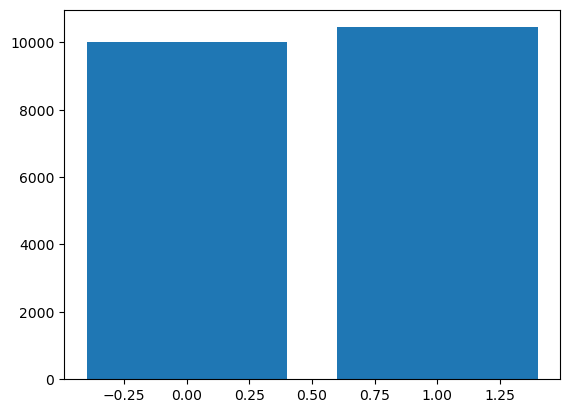

In [13]:
# MEDIAN STEPS BY WORK_OR_WEEKEND
x=[k for k in e]
y= [l for l in f]
plt.bar(x, y)

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [14]:
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,...,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,...,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,...,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,...,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


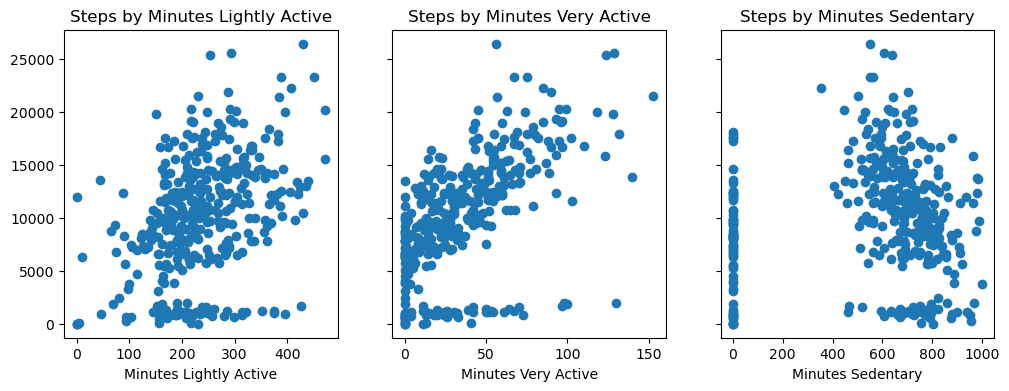

In [15]:
colnames= ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']

fig, axs = plt.subplots(1, len(colnames), sharey=True, figsize=(12,4))

i=1
while i <= len(colnames):
    for col in colnames:
        plt.subplot(1, len(colnames), i)
        plt.scatter(fitbit[col],fitbit['Steps'])
        plt.xlabel(col)
        plt.title(f'Steps by {col}')
        i+=1

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [16]:
titanic= pd.read_csv("titanic.csv")

#### Explore the titanic dataset using Pandas dtypes.

In [17]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [18]:
# NUMERICAL VARIABLES
titanic.select_dtypes(include=['int64', 'float64'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [19]:
# CATEGORICAL VARIABLES
titanic.select_dtypes(include='object')
# or exclude number 

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [20]:
sns.set_style("darkgrid")
# seaborn themes: darkgrid, whitegrid, dark, white, and ticks. 
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

````
f = plt.figure(figsize=(6, 6))
gs = f.add_gridspec(2, 2)

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    sinplot(6)
```

#### Use the right visulalization to show the distribution of column `Age`.

(array([ 72.,  78., 326., 347., 220., 136.,  75.,  42.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <BarContainer object of 10 artists>)

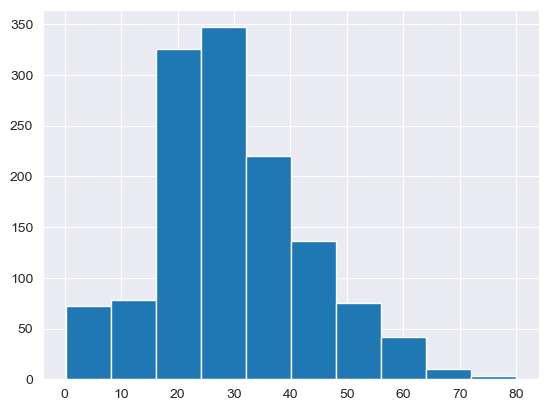

In [21]:
plt.hist(titanic["Age"])

<Axes: xlabel='Age', ylabel='Count'>

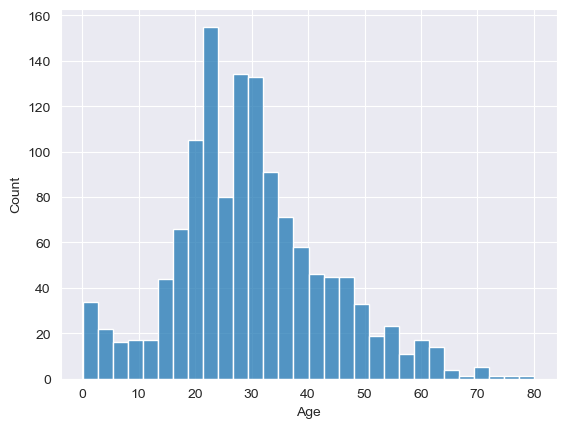

In [22]:
# to use seaborn
sns.histplot(titanic["Age"])

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

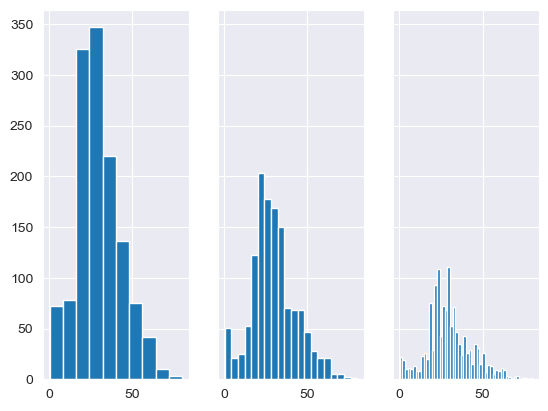

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True)

ax1.hist(titanic["Age"], bins=10)
ax2.hist(titanic["Age"], bins=20)
ax3.hist(titanic["Age"], bins=50)
plt.show()

#### How does the bin size affect your plot?

In [24]:
#the higher the number of bins, the more difficult it is to read 
#also, it reduces the vertical size of the bars  

#### Use seaborn to show the distribution of column `Age`.

<Axes: xlabel='Age', ylabel='Count'>

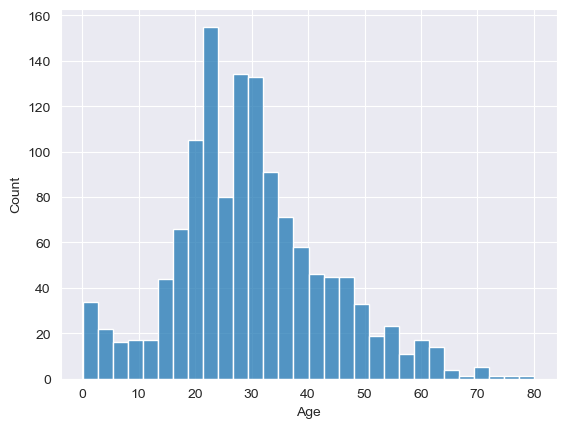

In [25]:
sns.histplot(titanic["Age"])


#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

(array([843., 466.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

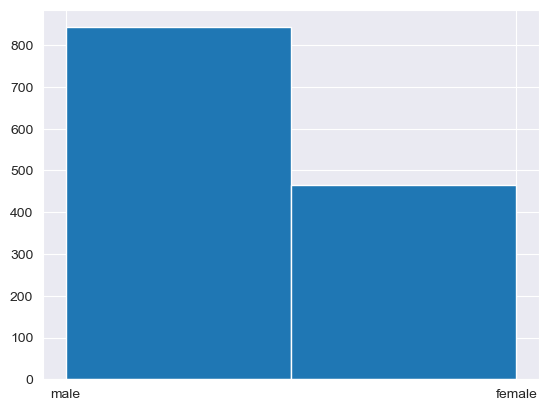

In [26]:
# Method 1 - matplotlib
plt.hist(titanic["Gender"], bins=2)
# we should set the ticks because this horrible graph makes me unhappy but no time.
# at least I didn't do a piechart

<Axes: xlabel='Gender', ylabel='Count'>

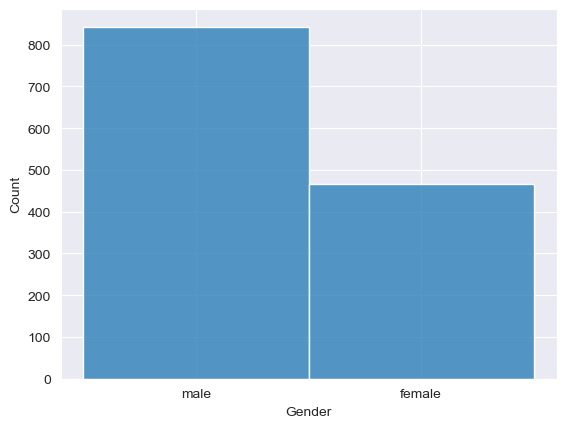

In [27]:
# Method 2 - seaborn
sns.histplot(data=titanic, x="Gender")

#### Use the right plot to visualize the column `Pclass`.

Text(0, 0.5, 'Count of passengers')

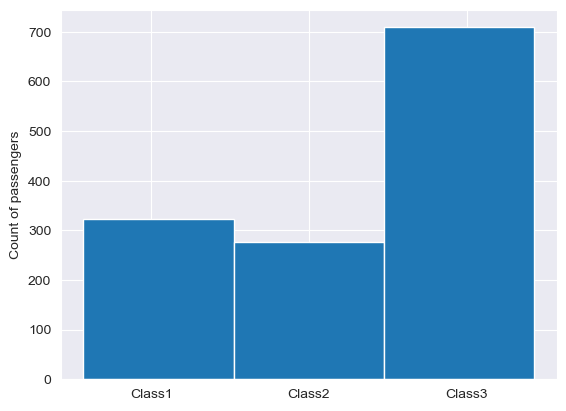

In [28]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharey=True)
plt.hist(titanic["Pclass"], bins=3)
ax1.set_xticks([1.3,2,2.7])
ax1.set_xticklabels(["Class1", "Class2", "Class3"], rotation=0, rotation_mode="anchor")
ax1.set_ylabel('Count of passengers')


#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

In [29]:
titanic["Age"].describe()

count    1309.000000
mean       29.879186
std        13.448335
min         0.170000
25%        22.000000
50%        28.500000
75%        37.000000
max        80.000000
Name: Age, dtype: float64

<Axes: >

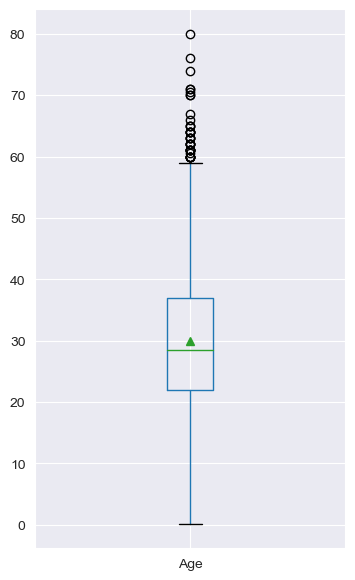

In [30]:
titanic.boxplot(column=['Age'], figsize=(4,7), showmeans=True)
#other arguments : by=None, ax=None, fontsize=None, rot=0, grid=True, layout=None, return_type=None, backend=None)
# extra arguments from matplotlib boxplot are vert= True (vertical boxes) or False (horizontal)
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html#matplotlib.pyplot.boxplot 


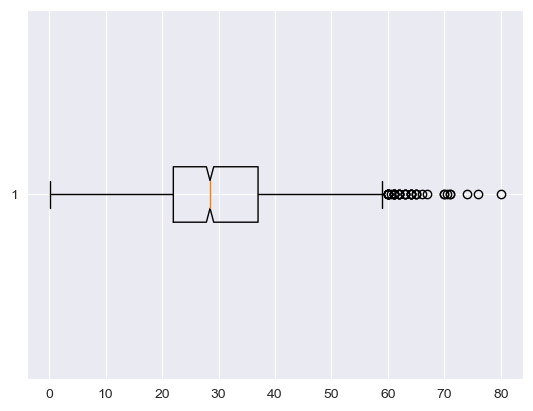

In [31]:
plt.boxplot(titanic['Age'], notch=True, vert=False )
plt.show()

#### What does the last plot tell you about the feature `Age`?

In [32]:
# There are many outliers representing older people
# but otherwise the population is under 60 
# the mean is below 30

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

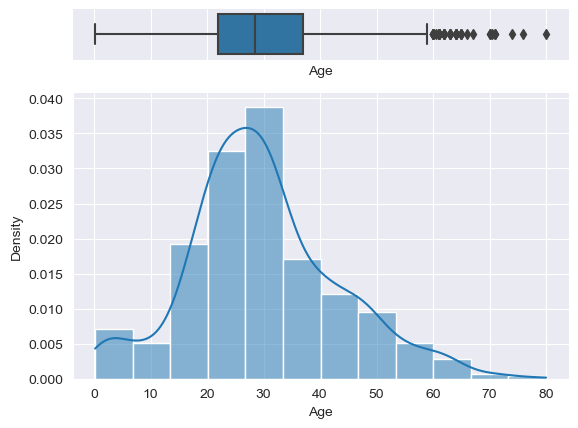

In [33]:
x = titanic["Age"]

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=x, ax=ax_box)
sns.histplot(x=x, bins=12, kde=True, stat='density', ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

<Axes: xlabel='Age'>

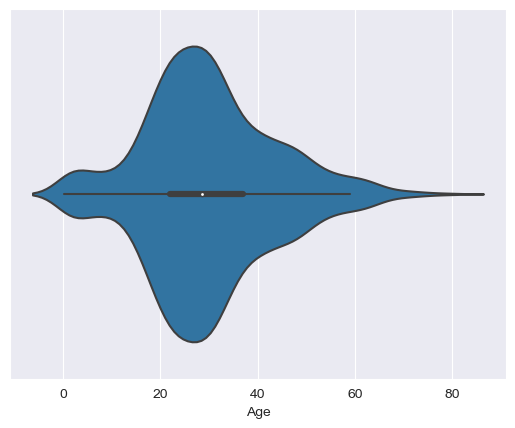

In [34]:
sns.violinplot(data=titanic, x='Age')

#### What additional information does the last plot provide about feature `Age`?

In [35]:
#age has a sligthly right skewed distribution
# but there is a high concentration of passengers between 25 and 35 years old.  

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

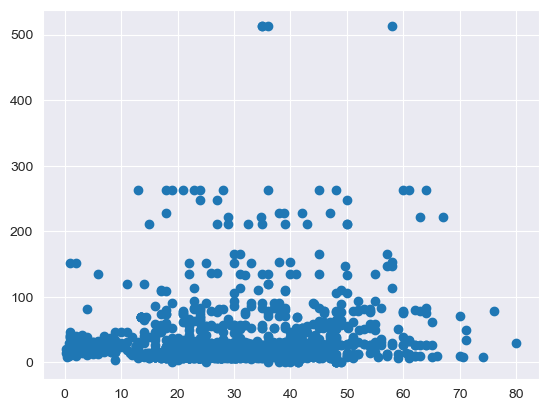

In [36]:
# Method 1 - matplotlib
# scatter plot or residual plot
plt.scatter(titanic['Age'], titanic['Fare'])
plt.show()

<Axes: xlabel='Age', ylabel='Fare'>

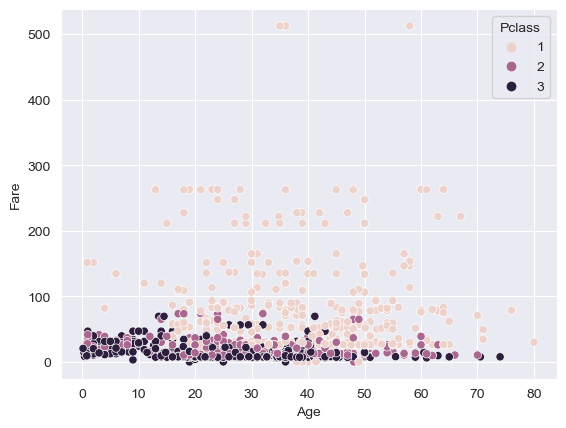

In [37]:
# Method 2 - seaborn
sns.scatterplot(data=titanic, x='Age', y='Fare', hue='Pclass')

#### Plot the correlation matrix using seaborn.

In [38]:
datacorr=titanic.corr(method='pearson')

/var/folders/5g/jskfzb8j377fh7wl3_rxvkrc0000gn/T/ipykernel_4265/300460825.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  datacorr=titanic.corr(method='pearson')


#### What are the most correlated features?

In [39]:
# Fare and class have a negative correlation (when class increases, fare decreases) 
# Age and class also have a negative correlation (when class increases, age decreases)
# finally, class and survival rate have a small negative correlation 
# while fare and survived have a small positive correlation. 
# but class is not a numeric value
# finally there seems to be a correlation between SibSP (number of siblings/spouses abord) 
# and Parch (number of parents/ children aboard), which makes sense. 


#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

In [40]:
class1=titanic.loc[titanic['Pclass']==1]
class2=titanic.loc[titanic['Pclass']==2]
class3=titanic.loc[titanic['Pclass']==3]


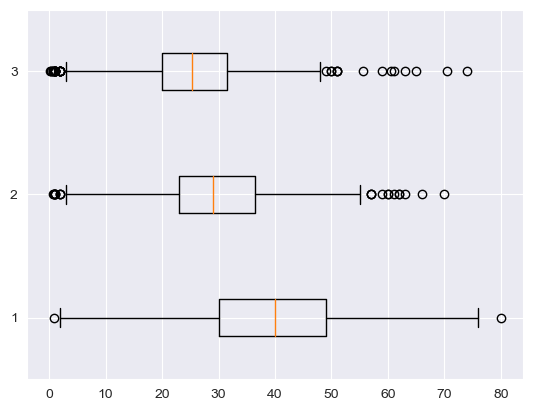

In [41]:
plt.boxplot([class1['Age'], class2['Age'], class3['Age']], vert=False)
plt.show()

<Axes: xlabel='Pclass', ylabel='Age'>

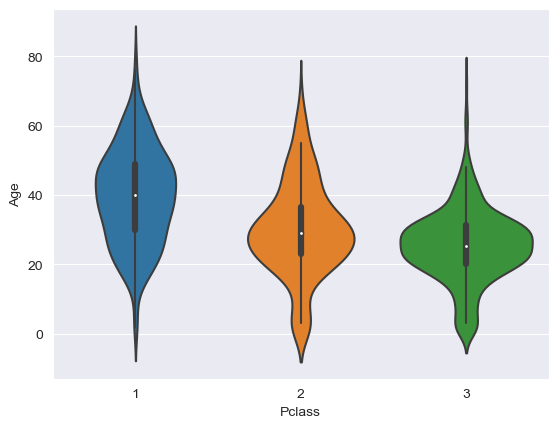

In [42]:
sns.violinplot(data=titanic, x='Pclass', y='Age')

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

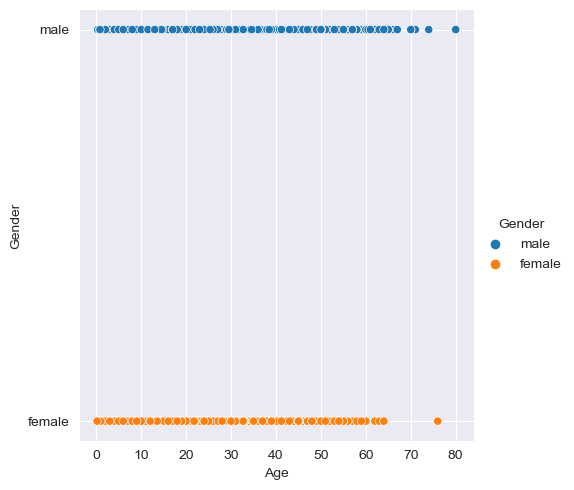

In [43]:
sns.relplot(data=titanic,  x='Age', y='Gender', hue='Gender');

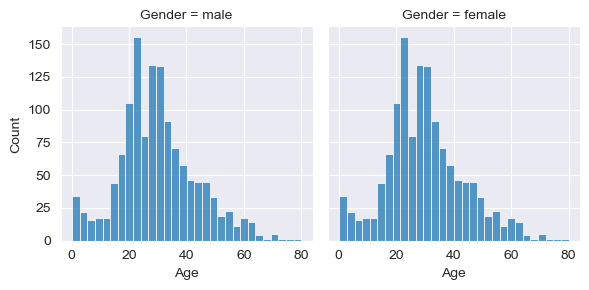

In [51]:
g = sns.FacetGrid(titanic, col='Gender')
g.map(sns.histplot, x=titanic['Age']);
#titanic.loc[titanic['Gender']=='male']['Age']);

In [ ]:
titanic.loc[titanic['Gender']=='male']['Age']

0       22.000000
4       35.000000
5       23.926502
6       54.000000
7        2.000000
          ...    
1298    50.000000
1304    29.513190
1306    38.500000
1307    29.513190
1308    25.315435
Name: Age, Length: 843, dtype: float64

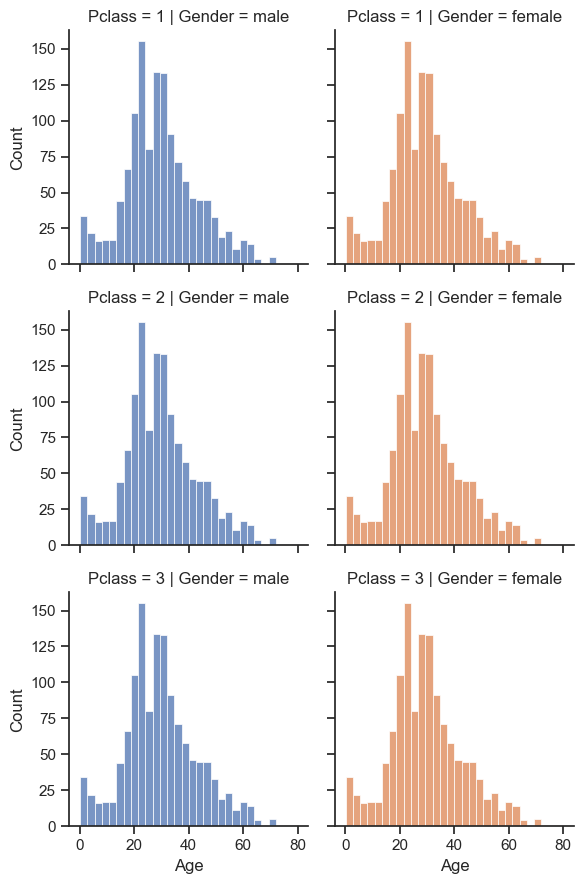

In [ ]:
g = sns.FacetGrid(titanic, col='Gender', row='Pclass', hue='Gender', sharex=True, sharey=True)
g.map(sns.histplot, x=titanic['Age'])

# can't seem to get it to give me the two different series for male and female... 